In [1]:
#
#
# https://www.youtube.com/watch?v=hOKa8klJPyo
import os
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import time
import ipyvolume as ipv

#%matplotlib widget
from PIL import Image

# https://biomedicalhub.github.io/python-data/skimage.html
import skimage.io as skio


In [2]:
imgs = []
"""
for file in os.listdir('data'):
    if file.endswith(".tif"):
        print(os.path.join("data", file))
        imgs.append(os.path.join("data", file))
"""

'\nfor file in os.listdir(\'data\'):\n    if file.endswith(".tif"):\n        print(os.path.join("data", file))\n        imgs.append(os.path.join("data", file))\n'

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


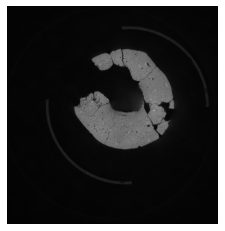

In [3]:
# read the image stack
#img_index = 5
#img = io.imread(imgs[img_index])
image_path = '/home/cnrs/ownCloud/data_local/2. CT Valerose/vlc_fromPisani_16bit/nV1_9/nV1_9_cropped.tif'
image_path = r'/scratch/USB-disk/ANR CIMO/CT CIMO/1. CT ASTR-X/astrx_données_mai16/obj1 (AP_0001)/Substack_135-1483_noBG.tif'

img = io.imread(image_path)

#img    = skio.imread(image_path, plugin="tifffile")



img_slice = 150
plt.imshow(img[img_slice],cmap='gray')
plt.axis('off')
plt.show()

#struct_arr    = skio.imread(image_path, plugin="tifffile")
#plt.imshow(struct_arr[75])


In [39]:
img[img_slice].shape
#img.shape
a = img.shape[0]
b = img.shape[1]
c = img.shape[2]
max(a, b, c)
img2 = img[:,:, :]
print(img2.shape)
#img2 = img.T
#print(img2.shape)
#img2 = img2.T
#print(img2.shape)
#img2 = np.array(img)
img2.shape

(1349, 1979, 1920)


(1349, 1979, 1920)

In [44]:
a = np.floor(0.5*img2.shape[0]) + 1000
b = np.floor(0.5*img2.shape[1]) + 1000
c = np.floor(0.5*img2.shape[2]) + 1000
f = ipv.figure()
ipv.volshow(img2,# lighting=False, level=[1.0, 0., 0.0], opacity=0.03, level_width=0.1,
                 extent=[[-a, a], [-b, b], [-c, c]]
           )
# ipv.xyzlim(img2.shape)
#ipv.xyzlim(b)
ipv.xyzlim(3000)
#ipv.xyzlim?
#ipv.squarelim()
ipv.show()

In [42]:
ipv.xyzlim?

In [38]:
f = ipv.figure()
aff = np.random.rand(32, 20, 8)
print(aff.shape)
ipv.volshow(aff, extent=[[-16,16],[-10,10],[-4,4]]
           )
ipv.xyzlim(16)
ipv.show()

(32, 20, 8)


In [21]:
# numpy array from img
imarray = np.array(img)
print(imarray.shape)
print(imarray.min(), imarray.max())

(1349, 1979, 1920)
0 59991


In [22]:
# histogram  (ignore cells containing 0)

# nb of slices of the histogram
nb_slices = 64

# threshold of the minimum value used fot histogram calculation
ceil = 1

# calculate the slices bundaries of the histogram
slices = []
for i in range(nb_slices+1):
    slices.append(i * imarray.max() / nb_slices)
slices[0] = ceil   # ignore 0 (black) in histogram calculation (air around the object)

start_time = time.perf_counter()
histo = np.histogram(imarray,bins = slices)[0]
#print(histo)
duration = time.perf_counter() - start_time
print("Histogram duration = "+ str(duration))

Histogram duration = 214.02114267100114


In [24]:
# display the histogram
im_flatview = imarray.ravel()  # nd-array to 1d-array (im_flatview is a view, modifying it modifies also imarray)
plt.hist(im_flatview, bins = slices) 
plt.title("histogram of "+ image_path) 
#plt.title("histogram of "+ imgs[img_index]) 
plt.show()

In [25]:
# thresholding 
#
# detect the first minima and maxima of the histogram
# and calculate the threshold with these values
#

start_time = time.perf_counter()

sum = 0
for v in histo:
    sum += v
minima = sum
maxima = -1
minima_index = -1
maxima_index = -1

# do not study the begining and end of the curve
start= int(nb_slices*1/10)
stop = int(nb_slices*2/3)
for i in range(start, stop):
    if ( histo[i] < minima):
        minima = histo[i]
        minima_index = i
    if ( histo[i] > maxima):
        maxima = histo[i]
        maxima_index = i

print("minima:" + str(minima) + " / index = "+ str(minima_index))
print("maxima:" + str(maxima) + " / index = "+ str(maxima_index))

if minima_index == -1 or maxima_index == -1 or minima_index > maxima_index:
    print("## automatic minima/maxima detection failed")
    print("## minima:" + str(minima) + " / index = "+ str(minima_index))
    print("## maxima:" + str(maxima) + " / index = "+ str(maxima_index))
    exit

# get a portion of the slope on histogram
cut = minima + (maxima - minima) * 1/25

# and then find the corresponding treshold
for i in range( minima_index, maxima_index):
    if histo[i] >= cut:
        threshold = i * imarray.max() / nb_slices
        break
            
print("threshold = " + str(threshold))
            
#inter = np.where(imarray>threshold,0,imarray)
#result=inter

inter  = np.where(imarray < ceil , imarray.max() ,imarray) # eliminates the cells containing 0
result = np.where(inter>threshold,0,inter)     # thresholding

duration = time.perf_counter() - start_time
print("Thresholding duration = "+ str(duration))

minima:6136 / index = 41
maxima:52651031 / index = 26
## automatic minima/maxima detection failed
## minima:6136 / index = 41
## maxima:52651031 / index = 26


NameError: name 'threshold' is not defined

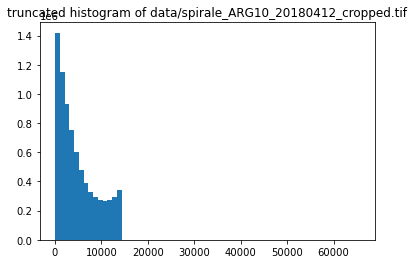

In [8]:
# histogram of the thresholded image  (black & white image)
#histo2, bins = np.histogram(result,bins = [0 , 0.5, 1]) 
#print(histo2)
#ratio = histo2[1] / (histo2[0]+ histo2[1])
#print("ratio = " + str(ratio))

# display the histogram with truncated values 
#histo2, bins = np.histogram(result,bins = slices) 

res_flatview = result.ravel() 
plt.hist(res_flatview, bins = slices) 
plt.title("truncated histogram of "+ image_path) 
#plt.title("truncated histogram of "+ imgs[img_index]) 
plt.show()

In [9]:
# do the requested thresholding by converting image to B&W
result = np.where(inter>threshold,0,1)      

# histogram of the thresholded image  (black & white image)
histo2 = np.histogram(result,bins = [0 , 0.5, 1])[0]
print(histo2)
ratio = histo2[1] / (histo2[0]+ histo2[1])
print("ratio black pixels = " + str(ratio))

[136570994   7784302]
ratio black pixels = 0.05392460280778338


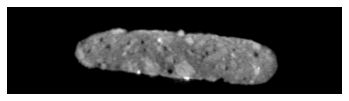

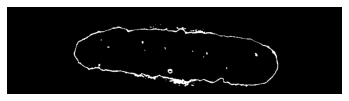

In [10]:
# display the results
plt.imshow(img[img_slice],cmap='gray')
plt.axis('off')
plt.show()

#plt.imshow(result[200], interpolation='nearest')
plt.imshow(result[img_slice],cmap='gray')
plt.axis('off')
plt.show()


In [13]:
ipv.quickvolshow(result, lighting=False, level=[1.0, 0., 0.0], opacity=0.03, level_width=0.1)

In [29]:
# https://github.com/maartenbreddels/ipyvolume/issues/35

f = ipv.figure()
ipv.volshow(result, lighting=False, level=[1.0, 0., 0.0], opacity=0.03, level_width=0.1, 
                 extent=[[1,result.shape[0]],[1,result.shape[1]],[1,result.shape[2]]])
#ipv.xyzlim(result.shape)
ipv.xyzlim(max(result.shape))
ipv.show()

In [21]:
print(result.shape)

(898, 204, 788)
